In [1]:
# 데이터 불러오기
import seaborn as sns
df = sns.load_dataset('titanic')

C:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# 결측치 확인 및 처리
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# 결측치 제거
print(df.dropna(axis=0).shape) # 행기준
print(df.dropna(axis=1).shape) # 열기준

(182, 15)
(891, 11)


In [8]:
import pandas as pd
df2 = df.copy()
df2 = pd.DataFrame(df)

In [9]:
# 중앙값 평균값 등으로 대체
# 1. 먼저 중앙값을 구함

median_age = df2['age'].median()

In [10]:
# 2. 구한 중앙값으로 결측치를 대체
df2['age']=df['age'].fillna(median_age)

In [11]:
# 결측치가 잘 대체되었는지 확인
df2.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
print(df['age'].mean())
print(df2['age'].mean())

29.69911764705882
29.36158249158249


- 이상치 확인 및 처리
- 상자그림 활용(이상치 Q1,Q3로부터 1.5*IQR을 초과하는 값)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

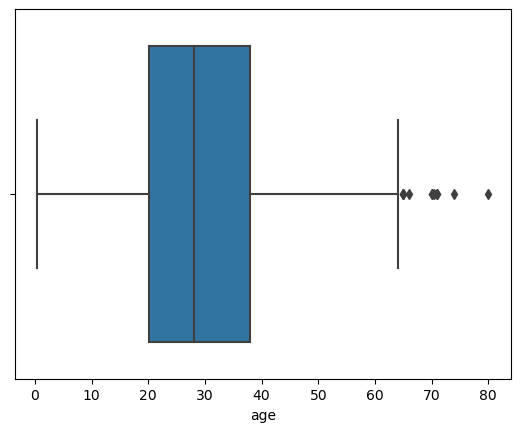

In [13]:
# 타이타닉 데이터 불러오기
df = sns.load_dataset('titanic')
# 참고 상자그림
sns.boxplot(df['age'])

In [15]:
# Q1,Q3,IQR 구하기
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

20.125 38.0 17.875


In [16]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
print(lower,upper)

-6.6875 64.8125


In [17]:
# 문제 : age변수의 이상치를 제외한 데이터 수는?
cond1 = (df['age']<=upper)
cond2 = (df['age']>=lower)
print(len(df[cond1&cond2]))
print(len(df[cond1]))
print(len(df))

703
703
891


In [18]:
# 문제 : age변수의 이상치를 제외한 데이터셋 확인
df_new = df[cond1&cond2]
df_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- 표준정규분포 활용(이상치 +,-3z 값을 넘어가는 값)

In [19]:
mean_age = df['age'].mean()
std_age = df['age'].std()
print(mean_age)
print(std_age)

29.69911764705882
14.526497332334044


In [20]:
znorm = (df['age']-mean_age)/std_age
znorm

0     -0.530005
1      0.571430
2     -0.254646
3      0.364911
4      0.364911
         ...   
886   -0.185807
887   -0.736524
888         NaN
889   -0.254646
890    0.158392
Name: age, Length: 891, dtype: float64

In [22]:
# 문제 : 이상치의 개수는 몇개인가?
cond1 = (znorm>3)
cond2 = (znorm<-3)
print(len(df[cond1]))
print(len(df[cond2]))

2
0


In [23]:
print(len(df[cond1])+len(df[cond2]))

2


- 중복값 제거

In [24]:
# 데이터 불러오기
df=sns.load_dataset('titanic')
df.shape

(891, 15)

In [25]:
df1 = df.copy()
df1 = df1.drop_duplicates()
print(df1.shape)

# 예제에서는 중복값이 있어서 제거했지만
# 중복값이 나올 수 있는 상황이면 제거할 필요없음

(784, 15)
